## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
hd = pd.read_csv('hotel_bookings.csv')
hd.tail(10)

,hotel,is_canceled,lead_time,arrival_month_year,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119380,City Hotel,0,44,August 2017,2017,August,35,31,1,3,...,No Deposit,9.0,NaN,0,Transient,140.75,0,1,Check-Out,04-09-2017
119381,City Hotel,0,188,August 2017,2017,August,35,31,2,3,...,No Deposit,14.0,NaN,0,Transient,99.00,0,0,Check-Out,05-09-2017
119382,City Hotel,0,135,August 2017,2017,August,35,30,2,4,...,No Deposit,7.0,NaN,0,Transient,209.00,0,0,Check-Out,05-09-2017
119383,City Hotel,0,164,August 2017,2017,August,35,31,2,4,...,No Deposit,42.0,NaN,0,Transient,87.60,0,0,Check-Out,06-09-2017
119384,City Hotel,0,21,August 2017,2017,August,35,30,2,5,...,No Deposit,394.0,NaN,0,Transient,96.14,0,2,Check-Out,06-09-2017
119385,City Hotel,0,23,August 2017,2017,August,35,30,2,5,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-2017
119386,City Hotel,0,102,August 2017,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-2017
119387,City Hotel,0,34,August 2017,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-2017
119388,City Hotel,0,109,August 2017,2017,August,35,31,2,5,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-2017
119389,City Hotel,0,205,August 2017,2017,August,35,29,2,7,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,07-09-2017


## Exploratory Data Analysis.

In [3]:
hd.shape

(119390, 33)

In [4]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_month_year              119390 non-null  object 
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-null  float64
 12  babies          

In [5]:
hd.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_month_year                     0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent           

In [6]:
# hd[['company']].value_counts()

## Defining Target Variable

In [7]:
X = hd.drop(['is_canceled'], axis = 1)
Y = hd[['is_canceled']]

# Getting the cancellation Rate.

In [8]:
Y.value_counts()

is_canceled
0              75166
1              44224
dtype: int64

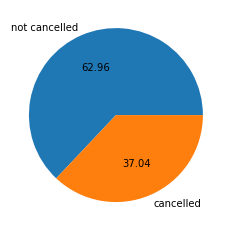

In [9]:
plt.pie(Y.value_counts(), labels = ['not cancelled', 'cancelled'], autopct = '%0.2f')
plt.show()

In [10]:
Y.value_counts()[1] / Y.count()  * 100

is_canceled    37.041628
dtype: float64

- We are getting a cancellation Rate of 37.04 % .

## Getting the unique values

In [11]:
for i in hd.columns:
    print(f'{i}  -->  {hd[i].nunique()}')
#     print()

hotel  -->  2
is_canceled  -->  2
lead_time  -->  479
arrival_month_year  -->  26
arrival_date_year  -->  3
arrival_date_month  -->  12
arrival_date_week_number  -->  53
arrival_date_day_of_month  -->  31
stays_in_weekend_nights  -->  17
stays_in_week_nights  -->  35
adults  -->  14
children  -->  5
babies  -->  5
meal  -->  5
country  -->  177
market_segment  -->  8
distribution_channel  -->  5
is_repeated_guest  -->  2
previous_cancellations  -->  15
previous_bookings_not_canceled  -->  73
reserved_room_type  -->  10
assigned_room_type  -->  12
booking_changes  -->  21
deposit_type  -->  3
agent  -->  333
company  -->  352
days_in_waiting_list  -->  128
customer_type  -->  4
adr  -->  8879
required_car_parking_spaces  -->  5
total_of_special_requests  -->  6
reservation_status  -->  3
reservation_status_date  -->  926


## Segregating Categorical and Numerical Features..

In [12]:
char = X.select_dtypes(include='object')

num = X.select_dtypes(include='number')

In [13]:
char.head()

,hotel,arrival_month_year,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July 2015,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,01-07-2015
1,Resort Hotel,July 2015,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,01-07-2015
2,Resort Hotel,July 2015,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,02-07-2015
3,Resort Hotel,July 2015,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,02-07-2015
4,Resort Hotel,July 2015,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,03-07-2015


In [14]:
char.value_counts().count()

68614

In [15]:
def unique_values(i):
    i = i.value_counts().count()
    return(i)

num_unique_val = pd.DataFrame(num.apply(lambda i: unique_values(i)))
    

In [16]:
# num_unique_val

In [17]:
num_unique_val.columns = ['features_levels']
num_unique_val.head()


,features_levels
lead_time,479
arrival_date_year,3
arrival_date_week_number,53
arrival_date_day_of_month,31
stays_in_weekend_nights,17


In [18]:
num_cat = num_unique_val[num_unique_val['features_levels'] <= 20]
num_cat


,features_levels
arrival_date_year,3
stays_in_weekend_nights,17
adults,14
children,5
babies,5
is_repeated_guest,2
previous_cancellations,15
required_car_parking_spaces,5
total_of_special_requests,6


## Concatenate categorical and <20 unique levels numerical cols

In [19]:
char.head()

,hotel,arrival_month_year,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July 2015,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,01-07-2015
1,Resort Hotel,July 2015,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,01-07-2015
2,Resort Hotel,July 2015,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,02-07-2015
3,Resort Hotel,July 2015,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,02-07-2015
4,Resort Hotel,July 2015,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,03-07-2015


In [20]:
char['hotel'].value_counts()


City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [21]:
cat_list = num_cat.index
cat_list

Index(['arrival_date_year', 'stays_in_weekend_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [22]:
num_cat1 = num.loc[:, cat_list]
num_cat1.dtypes

arrival_date_year                int64
stays_in_weekend_nights          int64
adults                           int64
children                       float64
babies                           int64
is_repeated_guest                int64
previous_cancellations           int64
required_car_parking_spaces      int64
total_of_special_requests        int64
dtype: object

In [23]:
char = pd.concat([char, num_cat1], axis = 1, join = 'inner')
char.dtypes

hotel                           object
arrival_month_year              object
arrival_date_month              object
meal                            object
country                         object
market_segment                  object
distribution_channel            object
reserved_room_type              object
assigned_room_type              object
deposit_type                    object
customer_type                   object
reservation_status              object
reservation_status_date         object
arrival_date_year                int64
stays_in_weekend_nights          int64
adults                           int64
children                       float64
babies                           int64
is_repeated_guest                int64
previous_cancellations           int64
required_car_parking_spaces      int64
total_of_special_requests        int64
dtype: object

## Numerical columns

In [24]:
num_n = num_unique_val[num_unique_val['features_levels'] >= 20]
num_n

,features_levels
lead_time,479
arrival_date_week_number,53
arrival_date_day_of_month,31
stays_in_week_nights,35
previous_bookings_not_canceled,73
booking_changes,21
agent,333
company,352
days_in_waiting_list,128
adr,8879


## Handling missing values -- Categorical columns

In [25]:
char.isnull().sum()

hotel                            0
arrival_month_year               0
arrival_date_month               0
meal                             0
country                        488
market_segment                   0
distribution_channel             0
reserved_room_type               0
assigned_room_type               0
deposit_type                     0
customer_type                    0
reservation_status               0
reservation_status_date          0
arrival_date_year                0
stays_in_weekend_nights          0
adults                           0
children                         4
babies                           0
is_repeated_guest                0
previous_cancellations           0
required_car_parking_spaces      0
total_of_special_requests        0
dtype: int64

In [26]:
mode = char['country'].mode()
mode

0    PRT
dtype: object

In [27]:
#  char.loc[:, 'country']

In [28]:
char['country'] = char.loc[:, 'country'].fillna(value = mode[0])

In [29]:
# char.isna().sum()

In [30]:
char['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [31]:
med = char['children'].median()
med

0.0

In [32]:
char['children'] = char.loc[:, 'children'].fillna(value = med)

In [33]:
char.isna().sum()

hotel                          0
arrival_month_year             0
arrival_date_month             0
meal                           0
country                        0
market_segment                 0
distribution_channel           0
reserved_room_type             0
assigned_room_type             0
deposit_type                   0
customer_type                  0
reservation_status             0
reservation_status_date        0
arrival_date_year              0
stays_in_weekend_nights        0
adults                         0
children                       0
babies                         0
is_repeated_guest              0
previous_cancellations         0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64

## Handling missing values -- Numerical columns

In [34]:
num

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,NaN,NaN,0,0.00,0,0
1,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,NaN,NaN,0,0.00,0,0
2,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,NaN,NaN,0,75.00,0,0
3,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,NaN,0,75.00,0,0
4,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,NaN,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,394.0,NaN,0,96.14,0,0
119386,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,9.0,NaN,0,225.43,0,2
119387,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,9.0,NaN,0,157.71,0,4
119388,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,89.0,NaN,0,104.40,0,0


In [35]:
num_list = num_n.index
num_list

Index(['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_week_nights', 'previous_bookings_not_canceled',
       'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr'],
      dtype='object')

In [36]:
num = num.loc[:, num_list]
num.dtypes

lead_time                           int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_week_nights                int64
previous_bookings_not_canceled      int64
booking_changes                     int64
agent                             float64
company                           float64
days_in_waiting_list                int64
adr                               float64
dtype: object

In [37]:
num.isna().sum()

lead_time                              0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_week_nights                   0
previous_bookings_not_canceled         0
booking_changes                        0
agent                              16340
company                           112593
days_in_waiting_list                   0
adr                                    0
dtype: int64

In [38]:
num['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
304.0        1
431.0        1
278.0        1
450.0        1
114.0        1
Name: agent, Length: 333, dtype: int64

In [39]:
num['agent'] = num.loc[:, 'agent'].fillna(value = num['agent'].mode()[0])

In [40]:
num.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr
0,342,27,1,0,0,3,9.0,NaN,0,0.0
1,737,27,1,0,0,4,9.0,NaN,0,0.0
2,7,27,1,1,0,0,9.0,NaN,0,75.0
3,13,27,1,1,0,0,304.0,NaN,0,75.0
4,14,27,1,2,0,0,240.0,NaN,0,98.0


In [41]:
num.isna().sum()

lead_time                              0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_week_nights                   0
previous_bookings_not_canceled         0
booking_changes                        0
agent                                  0
company                           112593
days_in_waiting_list                   0
adr                                    0
dtype: int64

In [42]:
miss_val_percentage = num['company'].isna().sum() / num.shape[0] * 100
miss_val_percentage

94.30689337465449

- Since the missing value % in company column is 94.34 %, so it can be dropped.

In [43]:
num = num.drop('company', axis=1)
num.dtypes

lead_time                           int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_week_nights                int64
previous_bookings_not_canceled      int64
booking_changes                     int64
agent                             float64
days_in_waiting_list                int64
adr                               float64
dtype: object

In [44]:
num.isna().sum()

lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_week_nights              0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
days_in_waiting_list              0
adr                               0
dtype: int64

# Treating Outliers for Numerical features

In [45]:
num.describe()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,27.165173,15.798241,2.500302,0.137097,0.221124,76.060080,2.321149,101.831122
std,106.863097,13.605138,8.780829,1.908286,1.497437,0.652306,106.323205,17.594721,50.535790
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000
25%,18.000000,16.000000,8.000000,1.000000,0.000000,0.000000,9.000000,0.000000,69.290000
50%,69.000000,28.000000,16.000000,2.000000,0.000000,0.000000,9.000000,0.000000,94.575000
75%,160.000000,38.000000,23.000000,3.000000,0.000000,0.000000,152.000000,0.000000,126.000000
max,737.000000,53.000000,31.000000,50.000000,72.000000,21.000000,535.000000,391.000000,5400.000000


In [46]:
num.describe(percentiles=[0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,27.165173,15.798241,2.500302,0.137097,0.221124,76.060080,2.321149,101.831122
std,106.863097,13.605138,8.780829,1.908286,1.497437,0.652306,106.323205,17.594721,50.535790
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000
1%,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
5%,0.000000,5.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,38.400000
10%,3.000000,8.000000,4.000000,1.000000,0.000000,0.000000,6.000000,0.000000,50.000000
20%,11.000000,14.000000,7.000000,1.000000,0.000000,0.000000,9.000000,0.000000,64.000000
30%,26.000000,18.000000,10.000000,1.000000,0.000000,0.000000,9.000000,0.000000,75.000000
40%,45.000000,23.000000,13.000000,2.000000,0.000000,0.000000,9.000000,0.000000,85.000000


In [47]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)


In [48]:
num = num.apply(lambda x: outlier_cap(x))

In [49]:
num.describe(percentiles=[0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,103.409180,27.173943,15.798241,2.479211,0.060273,0.209574,75.354753,1.606902,101.461251
std,104.600923,13.588582,8.780829,1.761267,0.376351,0.555245,103.962674,9.760268,46.905036
min,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
1%,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
5%,0.000000,5.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,38.400000
10%,3.000000,8.000000,4.000000,1.000000,0.000000,0.000000,6.000000,0.000000,50.000000
20%,11.000000,14.000000,7.000000,1.000000,0.000000,0.000000,9.000000,0.000000,64.000000
30%,26.000000,18.000000,10.000000,1.000000,0.000000,0.000000,9.000000,0.000000,75.000000
40%,45.000000,23.000000,13.000000,2.000000,0.000000,0.000000,9.000000,0.000000,85.000000


## Feature Engineering  --  Numerical Columns

# Part 1:  Remove features with 0 variance

In [50]:
from sklearn.feature_selection import VarianceThreshold
varselector = VarianceThreshold(threshold=0) 
varselector.fit_transform(num)

cols = varselector.get_support(indices=True)

num1 = num.iloc[:, cols]

In [51]:
cols

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [52]:
num1.iloc[0]  ## gives the first row at zeroth index..

lead_time                         342.0
arrival_date_week_number           27.0
arrival_date_day_of_month           1.0
stays_in_week_nights                0.0
previous_bookings_not_canceled      0.0
booking_changes                     3.0
agent                               9.0
days_in_waiting_list                0.0
adr                                 0.0
Name: 0, dtype: float64

In [53]:
import warnings
warnings.filterwarnings('ignore')

In [54]:
num1.tail()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr
119385,23,35,30,5,0,0,378.0,0,96.14
119386,102,35,31,5,0,0,9.0,0,225.43
119387,34,35,31,5,0,0,9.0,0,157.71
119388,109,35,31,5,0,0,89.0,0,104.40
119389,205,35,29,7,0,0,9.0,0,151.20


# Part 1 - Bi Variate Analysis (Feature Discretization)

In [55]:
from sklearn.preprocessing import KBinsDiscretizer
discrete = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile' )
num_binned=pd.DataFrame(discrete.fit_transform(num1), index = num1.index, columns=num1.columns).add_suffix('_Rank')
num_binned.tail()

,lead_time_Rank,arrival_date_week_number_Rank,arrival_date_day_of_month_Rank,stays_in_week_nights_Rank,previous_bookings_not_canceled_Rank,booking_changes_Rank,agent_Rank,days_in_waiting_list_Rank,adr_Rank
119385,2.0,6.0,9.0,5.0,0.0,0.0,5.0,0.0,5.0
119386,6.0,6.0,9.0,5.0,0.0,0.0,2.0,0.0,9.0
119387,3.0,6.0,9.0,5.0,0.0,0.0,2.0,0.0,8.0
119388,6.0,6.0,9.0,5.0,0.0,0.0,4.0,0.0,5.0
119389,8.0,6.0,9.0,5.0,0.0,0.0,2.0,0.0,8.0


In [56]:
num1.index


RangeIndex(start=0, stop=119390, step=1)

- strategy{‘uniform’, ‘quantile’, ‘kmeans’}, default=’quantile’
         Strategy used to define the widths of the bins.

    ‘uniform’: All bins in each feature have identical widths.

     ‘quantile’: All bins in each feature have the same number of points.

     ‘kmeans’: Values in each bin have the same nearest center of a 1D k-means cluster.


- n_binsint or array-like of shape (n_features,), default=5
    The number of bins to produce. Raises ValueError if n_bins < 2.

    encode{‘onehot’, ‘onehot-dense’, ‘ordinal’}, default=’onehot’
    Method used to encode the transformed result.

    ‘onehot’: Encode the transformed result with one-hot encoding and return a sparse matrix. Ignored features are always stacked to the right.

    ‘onehot-dense’: Encode the transformed result with one-hot encoding and return a dense array. Ignored features are always stacked to the right.

    ‘ordinal’: Return the bin identifier encoded as an integer value.

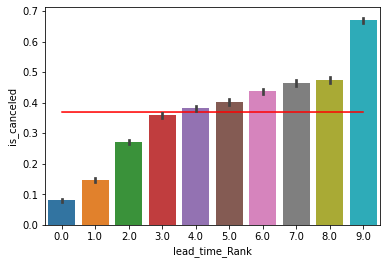

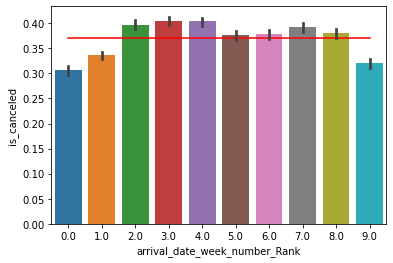

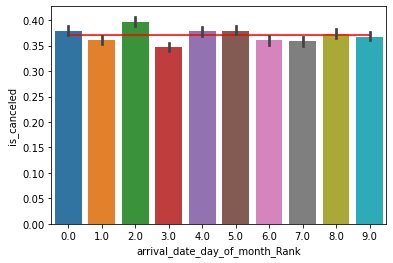

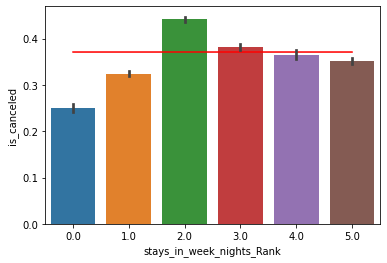

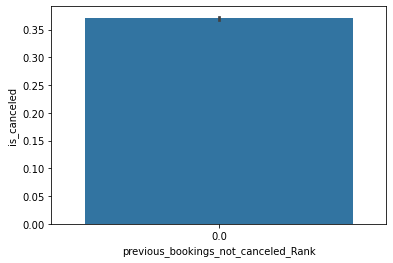

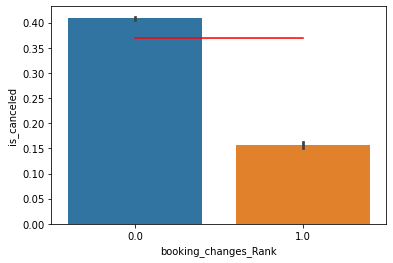

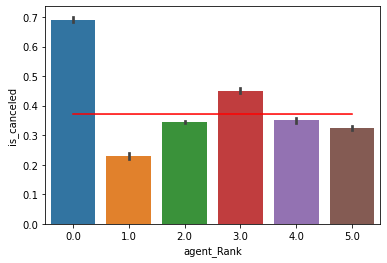

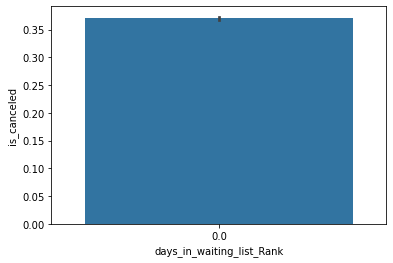

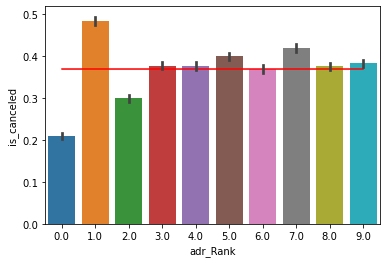

In [57]:
#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor

X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col, y=X_bin_combined['is_canceled'].mean(),data= X_bin_combined, color ='red')
    sns.barplot(x=col, y="is_canceled",data=X_bin_combined, estimator=mean )
plt.show()

In [58]:
num1.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr
0,342,27,1,0,0,3,9.0,0,0.0
1,444,27,1,0,0,3,9.0,0,0.0
2,7,27,1,1,0,0,9.0,0,75.0
3,13,27,1,1,0,0,304.0,0,75.0
4,14,27,1,2,0,0,240.0,0,98.0


In [59]:
# num1['previous_bookings_not_canceled'].value_counts()

In [60]:
# num1['booking_changes'].value_counts()

In [61]:
# num1['days_in_waiting_list'].value_counts()

In [62]:
## checking for Descriptive Statistics for the following features...

# previous_bookings_not_canceled
# days_in_waiting_list
# booking_changes

num1['day_waiting_ind'] = np.where(num1['days_in_waiting_list']>0,1,0)
num1['previous_bookings_not_canceled_ind'] = np.where(num1['previous_bookings_not_canceled']>0,1,0)
num1['booking_changes_ind'] = np.where(num1['booking_changes']>0,1,0)

##  Discretize the features 

    - previous_bookings_not_canceled
    - days_in_waiting_list
    - booking_changes  

📌 then drop the previous ones..

In [63]:
num1['day_waiting_ind'].value_counts()

0    115692
1      3698
Name: day_waiting_ind, dtype: int64

In [64]:
num_varlist = ['previous_bookings_not_canceled', 'days_in_waiting_list', 'booking_changes', 
               'arrival_date_day_of_month', 'arrival_date_week_number']
num1 = num1.drop(num_varlist, axis=1)

In [65]:
num1.shape

(119390, 7)

## Part 2: Select K best

In [66]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=4)
selector.fit_transform(num1, Y)
## Get columns to keep and create dataframe with those features only...

cols = selector.get_support(indices=True)
select_features_df_num = num.iloc[:, cols]


In [67]:
select_features_df_num.iloc[0]

lead_time                    342.0
arrival_date_day_of_month      1.0
stays_in_week_nights           0.0
agent                          9.0
Name: 0, dtype: float64

# Feature Selection -- Categorical Features


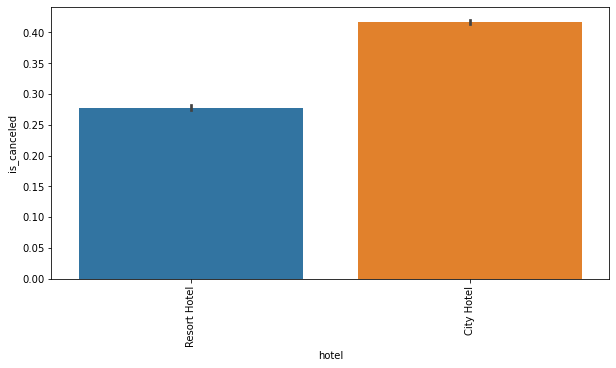

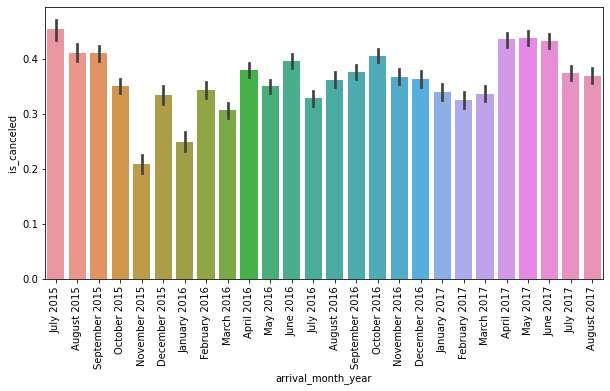

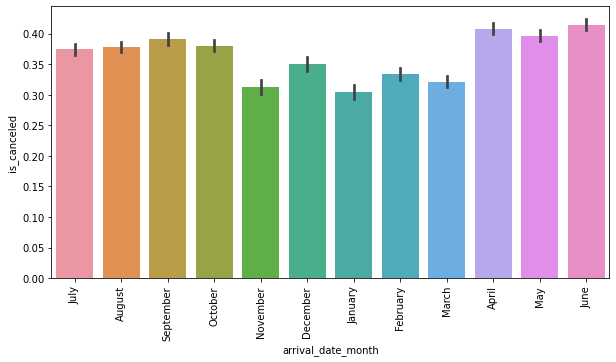

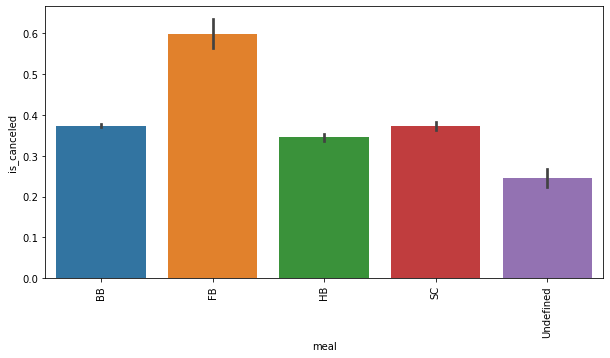

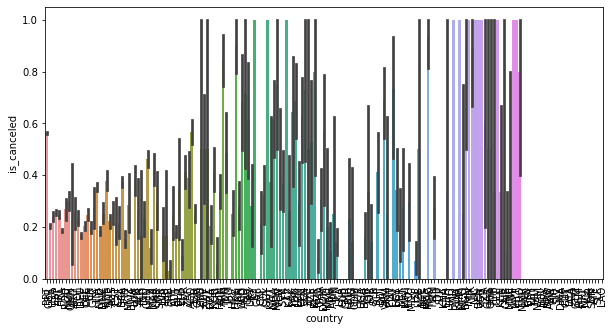

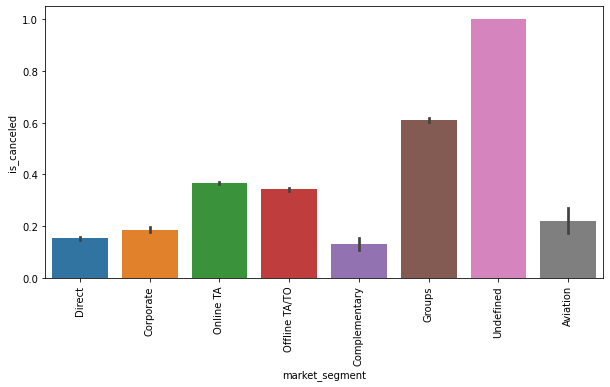

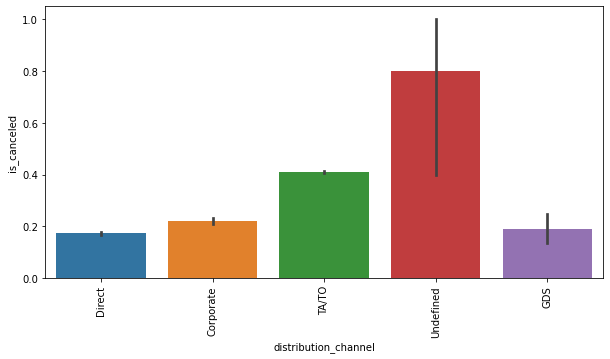

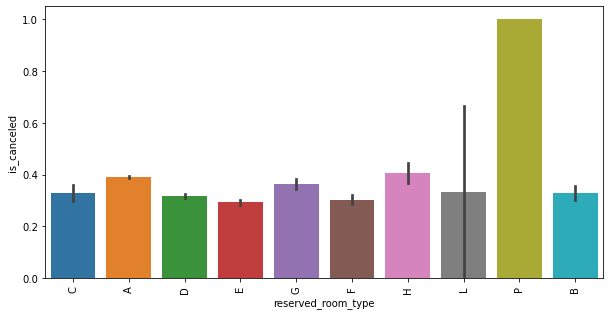

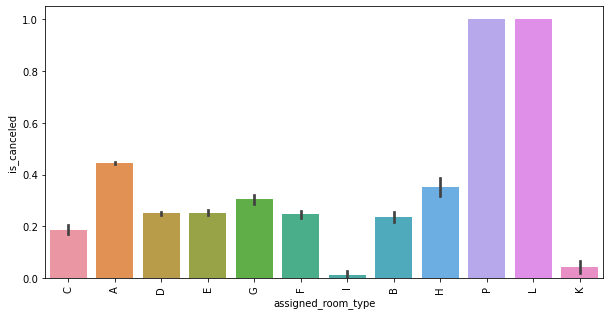

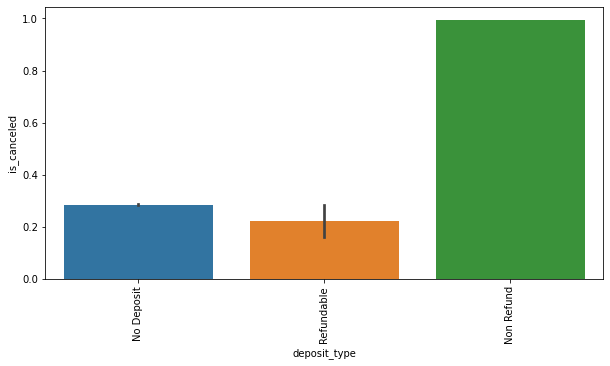

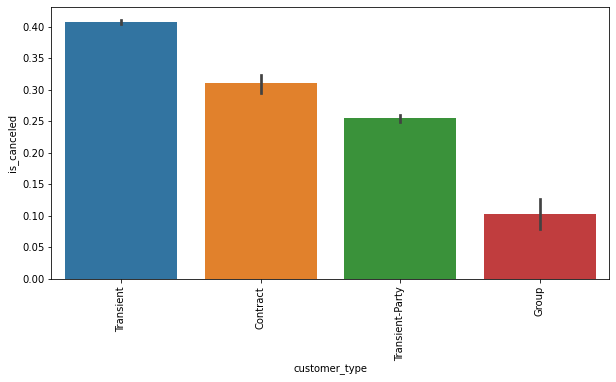

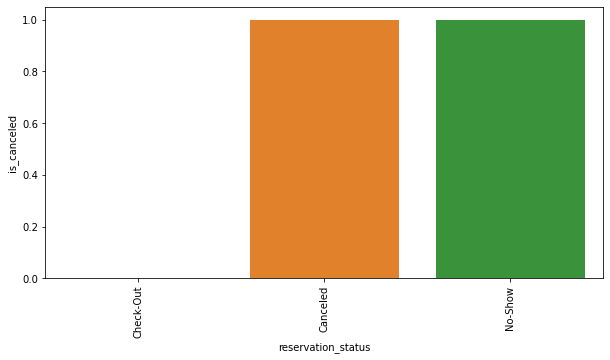

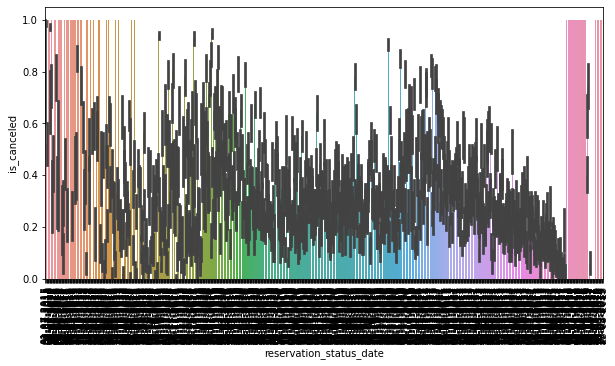

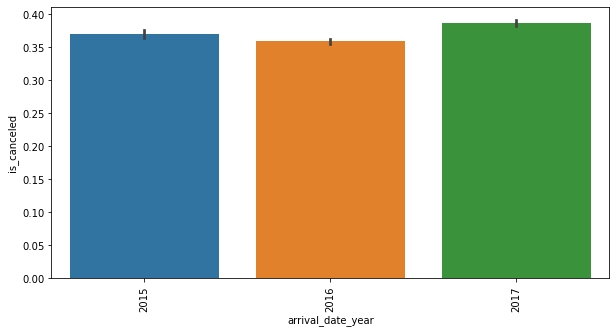

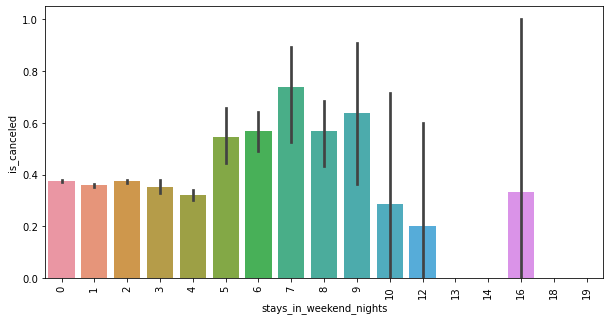

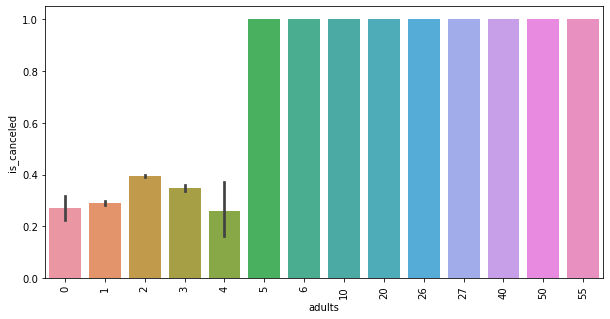

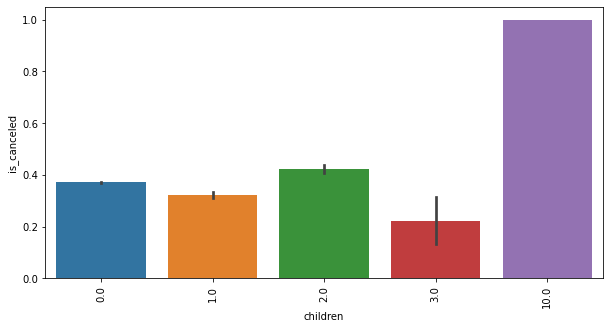

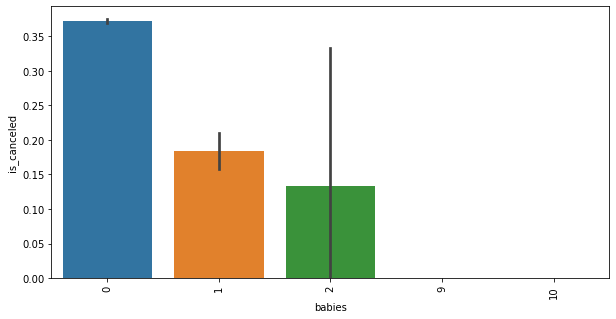

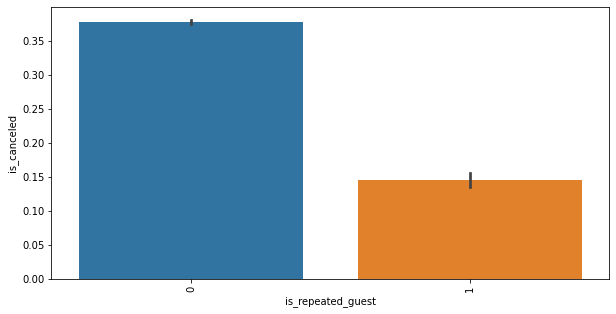

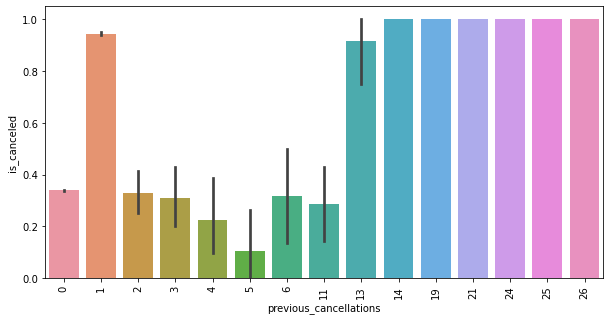

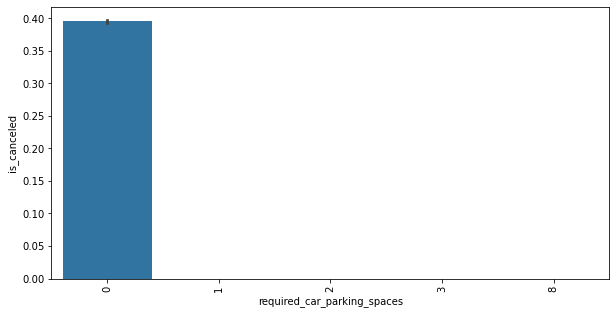

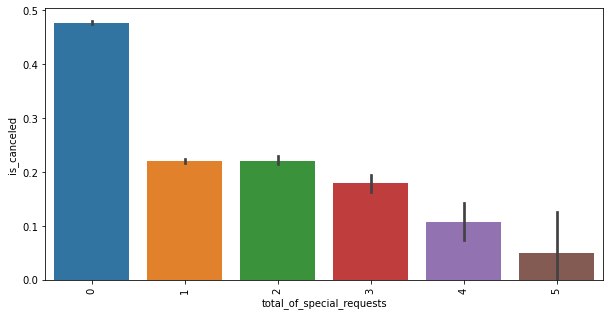

In [68]:
X_char_merged = pd.concat([Y,char],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure(figsize=(10,5))
    plt.xticks(rotation=90)
#     sns.lineplot(x=col, y=X_char_merged['is_canceled'].mean(),data= X_char_merged, color ='red')
    sns.barplot(x=col, y="is_canceled", data=X_char_merged, estimator=mean )
plt.show()





In [69]:
char.dtypes

hotel                           object
arrival_month_year              object
arrival_date_month              object
meal                            object
country                         object
market_segment                  object
distribution_channel            object
reserved_room_type              object
assigned_room_type              object
deposit_type                    object
customer_type                   object
reservation_status              object
reservation_status_date         object
arrival_date_year                int64
stays_in_weekend_nights          int64
adults                           int64
children                       float64
babies                           int64
is_repeated_guest                int64
previous_cancellations           int64
required_car_parking_spaces      int64
total_of_special_requests        int64
dtype: object

In [70]:
char['reservation_status'].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [71]:
char_drop = ['arrival_date_month', 'country', 'assigned_room_type', 'reservation_status', 'reservation_status_date',
             'arrival_date_year']


# char_1=char_1.drop(charlist,axis=1)

In [72]:
# char.dtypes

In [73]:
char['required_car_parking_spaces'].value_counts()

0    111974
1      7383
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

In [74]:
char = char.drop(char_drop, axis=1)

In [75]:
char.shape

(119390, 16)

## Create Dummy features with n-1 levels

In [76]:
X_char_dum = pd.get_dummies(char, drop_first = True)

X_char_dum.shape

(119390, 63)

# Part 2: Select K- Best

In [77]:
# from sklearn.feature_selection import SelectKBest, chi2
# selector_c = SelectKBest(chi2, k=50)
# selector_c.fit_transform(X_char_dum, Y)

# # Get columns to keep and create new DataFrame from those only
# cols = selector_c.get_support(indices=True)
# select_features_df_char = X_char_dum.iloc[:, cols]

In [78]:
# select_features_df_char.shape

# Combining the features 

In [79]:
x_final = pd.concat([X_char_dum, select_features_df_num], axis = 1, join='inner')

In [80]:
x_final.shape

(119390, 67)

In [81]:
pd.set_option('display.max_columns', None)
x_final.head()


,stays_in_weekend_nights,adults,children,babies,is_repeated_guest,previous_cancellations,required_car_parking_spaces,total_of_special_requests,hotel_Resort Hotel,arrival_month_year_April 2017,arrival_month_year_August 2015,arrival_month_year_August 2016,arrival_month_year_August 2017,arrival_month_year_December 2015,arrival_month_year_December 2016,arrival_month_year_February 2016,arrival_month_year_February 2017,arrival_month_year_January 2016,arrival_month_year_January 2017,arrival_month_year_July 2015,arrival_month_year_July 2016,arrival_month_year_July 2017,arrival_month_year_June 2016,arrival_month_year_June 2017,arrival_month_year_March 2016,arrival_month_year_March 2017,arrival_month_year_May 2016,arrival_month_year_May 2017,arrival_month_year_November 2015,arrival_month_year_November 2016,arrival_month_year_October 2015,arrival_month_year_October 2016,arrival_month_year_September 2015,arrival_month_year_September 2016,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,lead_time,arrival_date_day_of_month,stays_in_week_nights,agent
0,0,2,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,342,1,0,9.0
1,0,2,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,444,1,0,9.0
2,0,1,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7,1,1,9.0
3,0,1,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,13,1,1,304.0
4,0,2,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,14,1,2,240.0


In [82]:
x_final.dtypes

stays_in_weekend_nights            int64
adults                             int64
children                         float64
babies                             int64
is_repeated_guest                  int64
                                  ...   
customer_type_Transient-Party      uint8
lead_time                          int64
arrival_date_day_of_month          int64
stays_in_week_nights               int64
agent                            float64
Length: 67, dtype: object

In [83]:
x_final.loc[:'arrival_month_year_August 2015','arrival_month_year_September 2016'].head()

0    0
1    0
2    0
3    0
4    0
Name: arrival_month_year_September 2016, dtype: uint8

In [84]:
x_final.columns

Index(['stays_in_weekend_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'required_car_parking_spaces', 'total_of_special_requests',
       'hotel_Resort Hotel', 'arrival_month_year_April 2017',
       'arrival_month_year_August 2015', 'arrival_month_year_August 2016',
       'arrival_month_year_August 2017', 'arrival_month_year_December 2015',
       'arrival_month_year_December 2016', 'arrival_month_year_February 2016',
       'arrival_month_year_February 2017', 'arrival_month_year_January 2016',
       'arrival_month_year_January 2017', 'arrival_month_year_July 2015',
       'arrival_month_year_July 2016', 'arrival_month_year_July 2017',
       'arrival_month_year_June 2016', 'arrival_month_year_June 2017',
       'arrival_month_year_March 2016', 'arrival_month_year_March 2017',
       'arrival_month_year_May 2016', 'arrival_month_year_May 2017',
       'arrival_month_year_November 2015', 'arrival_month_year_November 2016',
     

In [85]:
for i in x_final.columns:
    print(f'{i}---->{x_final[i].value_counts()}')
    print()

stays_in_weekend_nights---->0     51998
2     33308
1     30626
4      1855
3      1259
6       153
5        79
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64

adults---->2     89680
1     23027
3      6202
0       403
4        62
26        5
5         2
20        2
27        2
6         1
10        1
40        1
50        1
55        1
Name: adults, dtype: int64

children---->0.0     110800
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

babies---->0     118473
1        900
2         15
9          1
10         1
Name: babies, dtype: int64

is_repeated_guest---->0    115580
1      3810
Name: is_repeated_guest, dtype: int64

previous_cancellations---->0     112906
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
5         19
19        19
14        14
13        12


# Train Test Split

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_final, Y, test_size=0.3, random_state=20)

In [87]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)

Shape of Training Data (83573, 67)
Shape of Testing Data (35817, 67)


- Another important step in feature engineering is to scale the data as logistic regression is sensitive to  whether or not the
    
    data has been scaled. If the data is not scaled, 
    the model might consider 3000 grams to be greater than 5 KG which may result in erroneous prediction.

# Logistic Regression Model 

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)

LogisticRegression()

# Prediction

In [89]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Performance & Accuracy

In [90]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[20740,  1812],
       [ 5623,  7642]], dtype=int64)

In [91]:
recall = 7642/(7642+5623) ## TP/(TP + FN)
recall

0.5761025254428949

In [92]:
precision = 7642/(7642+1813)  ## TP/(TP + FP)
precision

0.8082496033844526

In [93]:
print('Accuracy:',metrics.accuracy_score(y_test, y_pred))
print('recall:',metrics.recall_score(y_test, y_pred))
print('precision:',metrics.precision_score(y_test, y_pred))
print('f-score:',metrics.f1_score(y_test, y_pred))

Accuracy: 0.7924170086830276
recall: 0.5761025254428949
precision: 0.8083350962555532
f-score: 0.6727408776794754



Assuming your target is (0,1), then the classifier would output a probability matrix of dimension (N,2). 
The first index refers to the probability that the data belong to class 0, 
and the second refers to the probability that the data belong to class 1.

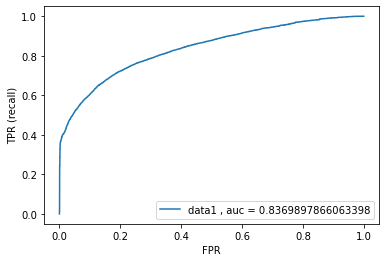

In [94]:



y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr , tpr , _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label = "data1 , auc = "+str(auc))
plt.legend(loc =4)
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.show()

## Training XGBoost on the Training set

In [95]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

[00:29:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

y_pred_xgb = classifier.predict(X_test)


print('Accuracy:',metrics.accuracy_score(y_test, y_pred_xgb))
print('recall:',metrics.recall_score(y_test, y_pred))
print('precision:',metrics.precision_score(y_test, y_pred_xgb))
print('f-score:',metrics.f1_score(y_test, y_pred_xgb))

Accuracy: 0.8454365245553788
recall: 0.5761025254428949
precision: 0.8513501227384308
f-score: 0.7718430596768875


# Decision Tree Classifier

In [97]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion='gini', random_state=20,max_depth=9,min_samples_split=140)
DTC.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9, min_samples_split=140, random_state=20)

In [98]:
# Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=0,max_depth=9,min_samples_split=140)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=9, min_samples_split=140, random_state=0)

In [99]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=9,min_samples_split=140)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=9, min_samples_split=140,
                           random_state=0)

In [100]:
# Model Evaluation
y_pred_tree=DTC.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)

In [101]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.818912806767736
Precision 0.8332514010421788
Recall 0.638899359215982
f1_score 0.7232462877624168


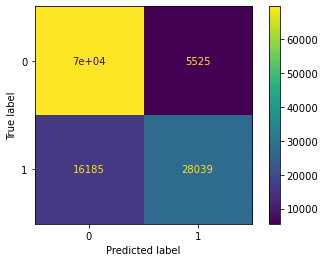

In [102]:
metrics.plot_confusion_matrix(DTC,x_final,Y)

In [103]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.8166233911271185
Precision 0.8744269260874427
Recall 0.5895212966453072
f1_score 0.7042507204610952


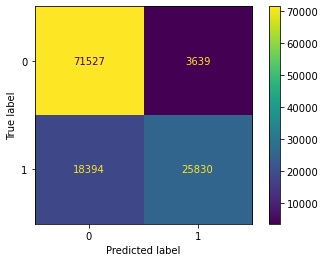

In [104]:
metrics.plot_confusion_matrix(rf,x_final,Y)

In [105]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision",metrics.precision_score(y_test,y_pred_gbm))
print("Recall",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(y_test,y_pred_gbm))

Accuracy: 0.8460507580199347
Precision 0.858278635481187
Recall 0.6998869204673954
f1_score 0.7710323062868533


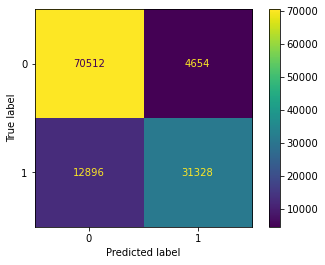

In [106]:
metrics.plot_confusion_matrix(gbm,x_final,Y)

As the overall performance of Gradient Boosting Model is the best, we will go with this model.


## Saving the model

In [107]:
import pickle
pickle.dump(gbm,open('hotel.pkl','wb'))


In [9]:

z2=[]
def reserved_room_type(x):
    if x=='A':
        return [0,0,0,0,0,0,0,0,0]
    else:
        dict1 = {'B':0,'C':0,'D':0,'E':0,'F':0,'G':0,'H':0,'L':0,'P':0}
        dict1[x] = 1
    
    for i in dict1:
        z2.append(dict1[i])
    print(z2)

In [11]:
reserved_room_type('A')

[0, 0, 0, 0, 0, 0, 0, 0, 0]

In [8]:
z3=[]

def meal(y):
    x = 'meal_'+ y
    if x=='meal_BB':
        return [0,0,0,0]
    else:
        dict3={'meal_FB':0, 'meal_HB':0, 'meal_SC':0,'meal_Undefined':0}
        dict3[x]=1
        for i in dict3:
            z3.append(dict3[i])
        print(z3)
meal('BB')

[0, 0, 0, 0]

In [12]:
x = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
len(x)

25

In [13]:
z4=[]
def arrival_month_year(x1,x2):
    p = 'arrival_month_year_'+x1+' '+str(x2)
    if p=='arrival_month_year_April 2016':
        return [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    else:
        dict4={'arrival_month_year_April 2017':0,'arrival_month_year_August 2015':0,'arrival_month_year_August 2016':0,
        'arrival_month_year_August 2017':0, 'arrival_month_year_December 2015':0,'arrival_month_year_December 2016':0, 
        'arrival_month_year_February 2016':0,'arrival_month_year_February 2017':0, 'arrival_month_year_January 2016':0,
        'arrival_month_year_January 2017':0, 'arrival_month_year_July 2015':0,'arrival_month_year_July 2016':0, 
        'arrival_month_year_July 2017':0,'arrival_month_year_June 2016':0, 'arrival_month_year_June 2017':0,
    'arrival_month_year_March 2016':0, 'arrival_month_year_March 2017':0,'arrival_month_year_May 2016':0, 
    'arrival_month_year_May 2017':0,'arrival_month_year_November 2015':0, 'arrival_month_year_November 2016':0,
    'arrival_month_year_October 2015':0, 'arrival_month_year_October 2016':0,'arrival_month_year_September 2015':0,
    'arrival_month_year_September 2016':0}
        dict4[p]=1
        for i in dict4:
            z4.append(dict4[i])
        return z4

In [18]:
arrival_month_year('April',2015)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

In [113]:
list1 = ['arrival_month_year_April 2017','arrival_month_year_August 2015','arrival_month_year_August 2016','arrival_month_year_August 2017','arrival_month_year_December 2015','arrival_month_year_December 2016','arrival_month_year_February 2016','arrival_month_year_February 2017','arrival_month_year_January 2016','arrival_month_year_January 2017','arrival_month_year_July 2015','arrival_month_year_July 2016','arrival_month_year_July 2017','arrival_month_year_June 2016','arrival_month_year_June 2017','arrival_month_year_March 2016','arrival_month_year_March 2017','arrival_month_year_May 2016','arrival_month_year_May 2017','arrival_month_year_November 2015','arrival_month_year_November 2016','arrival_month_year_October 2015','arrival_month_year_October 2016','arrival_month_year_September 2015','arrival_month_year_September 2016']

In [114]:
len(list1)

25

In [115]:
count=0
z=[]
for i in x_final.columns:
    
    z.append(i)
print(len(z[9:34]))
    

25


In [116]:
x='DECEMBER'
y=x.lower()#.capitalize()
z=y.capitalize()
z

'December'

In [117]:
z5=[]

def market_segment(y):
    x = 'market_segment_'+ y
    if x=='market_segment_Aviation':
        return [0,0,0,0,0,0,0]
    else:
        dict5={'market_segment_Complementary':0, 'market_segment_Corporate':0, 'market_segment_Direct':0,'market_segment_Groups':0,'market_segment_Offline TA/TO':0,'market_segment_Online TA':0, 'market_segment_Undefined':0}
        dict5[x]=1
        for i in dict5:
            z5.append(dict5[i])
        print(z5)
market_segment('Corporate')

[0, 1, 0, 0, 0, 0, 0]


In [118]:
z6=[]

def distribution_channel(y):
    x = 'distribution_channel_'+ y
    if x=='distribution_channel_Corporate':
        return [0,0,0,0,0,0,0]
    else:
        dict6={'distribution_channel_Direct':0, 'distribution_channel_GDS':0, 'distribution_channel_TA/TO':0,'distribution_channel_Undefined':0}
        dict6[x]=1
        for i in dict6:
            z6.append(dict6[i])
        print(z6)
distribution_channel('GDS')

[0, 1, 0, 0]


In [119]:

z7=[]

def deposit_type(y):
    x = 'deposit_type_'+ y
    if x=='deposit_type_No Deposit':
        return [0,0]
    else:
        dict7={'deposit_type_Non Refund':0, 'deposit_type_Refundable':0}
        dict7[x]=1
        
        for i in dict7:
            z7.append(dict7[i])
        print(z7)
deposit_type('Refundable')

[0, 1]


In [120]:

z8=[]

def customer_type(y):
    x = 'customer_type_'+ y
    if x=='customer_type_Contract':
        return [0,0,0]
    else:
        dict8={'customer_type_Group':0, 'customer_type_Transient':0,'customer_type_Transient_party':0}
        dict8[x]=1
        for i in dict8:
            z8.append(dict8[i])
        print(z8)
customer_type('Group')

[1, 0, 0]


In [121]:
import pickle
pickle.dump(gbm,open('hotel.pkl','wb'))